In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader, sampler
from torchvision import transforms, datasets

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

# 定义绘图函数
def show_images(images, count):
    images = images.detach().numpy()[0:16,:]
    images = 255*(0.5*images+0.5)
    images = images.astype(np.uint8)
    grid_length = int(np.ceil(np.sqrt(images.shape[0])))
    plt.figure(figsize=(4,4))
    width = int(np.sqrt((images.shape[1])))
    gs = gridspec.GridSpec(grid_length,grid_length,wspace=0,hspace=0)
    # gs.update(wspace=0, hspace=0)
    print('starting...')
    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([width,width]),cmap = plt.cm.gray)
        plt.axis('off')
        plt.tight_layout()
    print('showing...')
    plt.tight_layout()
#     plt.savefig('./GAN_Image/%d.png'%count, bbox_inches='tight')

In [3]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# 加载数据，MNIST图片的大小是28*28
def load_MNIST(batch_size):
    transform = transforms.Compose([transforms.ToTensor()])
    train_set = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_set = datasets.MNIST(root='./data', train=False, transform=transform, download=False)
    train_loader=DataLoader(train_set,batch_size=batch_size,shuffle=True,num_workers=10)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=10)
    return train_set, test_set, train_loader, test_loader

# 鉴别器
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator,self).__init__()
        self.dis=nn.Sequential(
            nn.Linear(784,300),
            nn.LeakyReLU(0.2),
            nn.Linear(300,150),
            nn.LeakyReLU(0.2),
            nn.Linear(150,1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.dis(x)
        return x

# 生成器
class generator(nn.Module):
    def __init__(self,input_size):
        super(generator,self).__init__()
        self.gen=nn.Sequential(
            nn.Linear(input_size,150),
            nn.ReLU(True),
            nn.Linear(150,300),
            nn.ReLU(True),
            nn.Linear(300,784),
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.gen(x)
        return x

/home/yaliu/Dev/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Epoch [0/100], d_loss: 0.7247, g_loss: 2.5216, D_real: 0.770, D_fake: 0.272
starting...
showing...


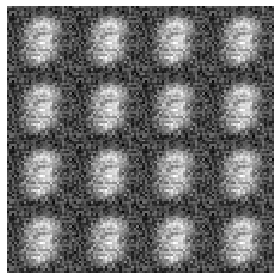

Epoch [1/100], d_loss: 0.5269, g_loss: 3.1409, D_real: 0.855, D_fake: 0.237
starting...
showing...


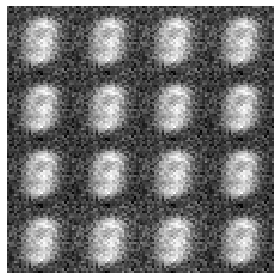

Epoch [2/100], d_loss: 0.2473, g_loss: 3.5577, D_real: 0.899, D_fake: 0.088
starting...
showing...


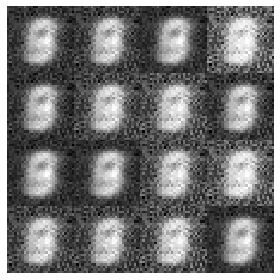

Epoch [3/100], d_loss: 0.0770, g_loss: 4.7598, D_real: 0.979, D_fake: 0.040
starting...
showing...


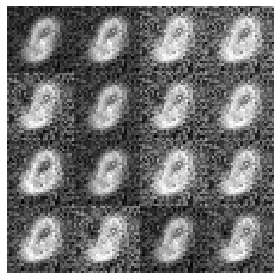

Epoch [4/100], d_loss: 0.2185, g_loss: 5.7691, D_real: 0.946, D_fake: 0.089
starting...
showing...


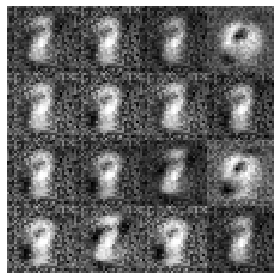

Epoch [5/100], d_loss: 0.3556, g_loss: 6.1717, D_real: 0.892, D_fake: 0.053
starting...
showing...


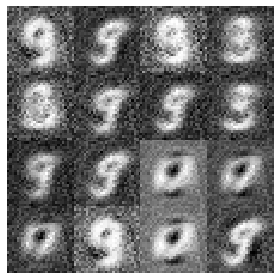

Epoch [6/100], d_loss: 0.1685, g_loss: 5.3043, D_real: 0.949, D_fake: 0.062
starting...
showing...


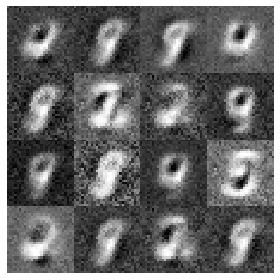

Epoch [7/100], d_loss: 0.3889, g_loss: 4.3921, D_real: 0.904, D_fake: 0.093
starting...
showing...


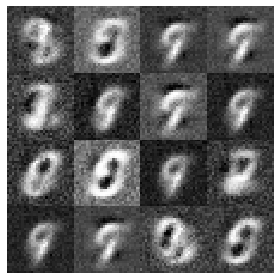

Epoch [8/100], d_loss: 0.4396, g_loss: 4.5022, D_real: 0.886, D_fake: 0.142
starting...
showing...


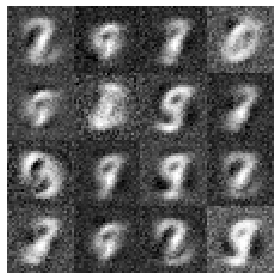

Epoch [9/100], d_loss: 0.2498, g_loss: 5.1861, D_real: 0.933, D_fake: 0.070
starting...
showing...


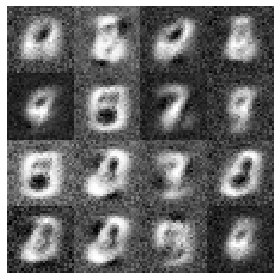

Epoch [10/100], d_loss: 0.2579, g_loss: 5.6060, D_real: 0.916, D_fake: 0.064
starting...
showing...


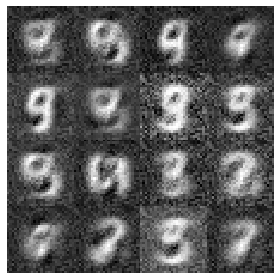

Epoch [11/100], d_loss: 0.3058, g_loss: 4.8809, D_real: 0.915, D_fake: 0.026
starting...
showing...


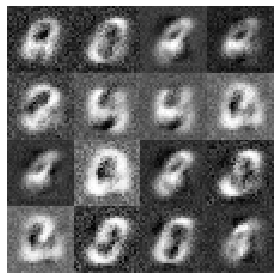

Epoch [12/100], d_loss: 0.0647, g_loss: 7.2653, D_real: 0.981, D_fake: 0.031
starting...
showing...


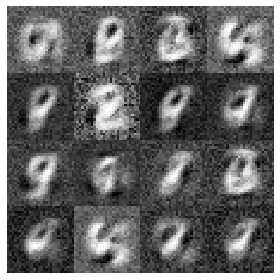

Epoch [13/100], d_loss: 0.1207, g_loss: 5.9140, D_real: 0.968, D_fake: 0.032
starting...
showing...


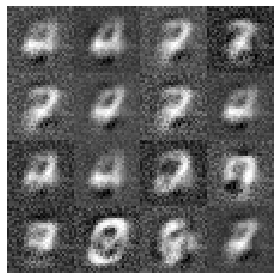

Epoch [14/100], d_loss: 0.1605, g_loss: 6.7106, D_real: 0.963, D_fake: 0.059
starting...
showing...


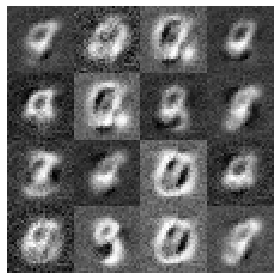

Epoch [15/100], d_loss: 0.1498, g_loss: 6.2916, D_real: 0.985, D_fake: 0.091
starting...
showing...


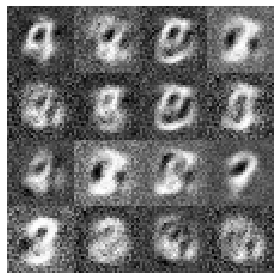

Epoch [16/100], d_loss: 0.1728, g_loss: 4.4221, D_real: 0.964, D_fake: 0.055
starting...
showing...


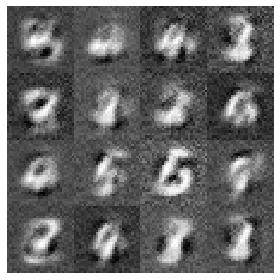

Epoch [17/100], d_loss: 0.1445, g_loss: 6.4973, D_real: 0.973, D_fake: 0.061
starting...
showing...


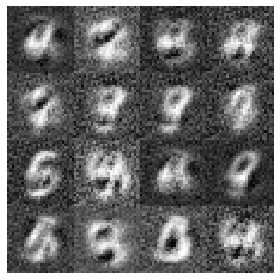

Epoch [18/100], d_loss: 0.1152, g_loss: 6.3802, D_real: 0.962, D_fake: 0.041
starting...
showing...


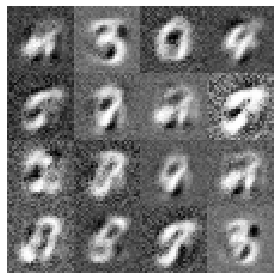

Epoch [19/100], d_loss: 0.1491, g_loss: 7.1985, D_real: 0.931, D_fake: 0.007
starting...
showing...


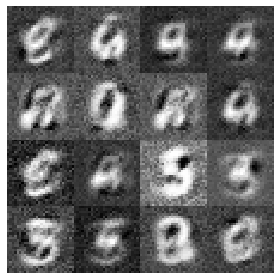

Epoch [20/100], d_loss: 0.2794, g_loss: 8.0855, D_real: 0.968, D_fake: 0.095
starting...
showing...


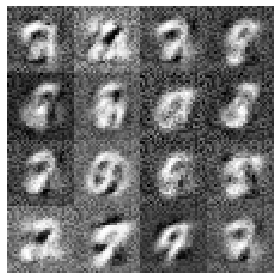

Epoch [21/100], d_loss: 0.0996, g_loss: 9.0117, D_real: 0.963, D_fake: 0.003
starting...
showing...


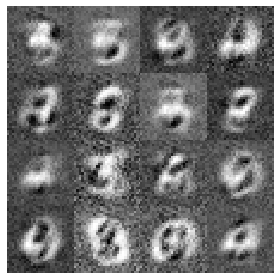

Epoch [22/100], d_loss: 0.0812, g_loss: 7.0818, D_real: 0.965, D_fake: 0.014
starting...
showing...


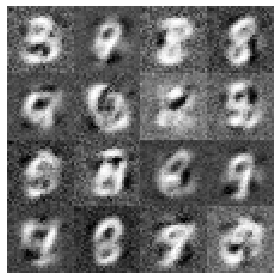

Epoch [23/100], d_loss: 0.1791, g_loss: 5.9824, D_real: 0.920, D_fake: 0.033
starting...
showing...


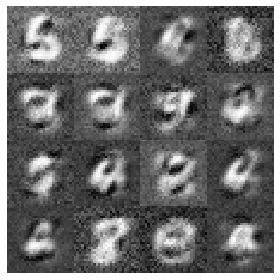

Epoch [24/100], d_loss: 0.0406, g_loss: 7.6389, D_real: 0.984, D_fake: 0.016
starting...
showing...


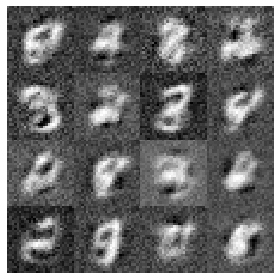

Epoch [25/100], d_loss: 0.1119, g_loss: 5.8157, D_real: 0.954, D_fake: 0.032
starting...
showing...


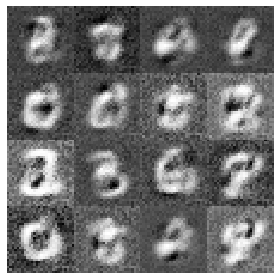

Epoch [26/100], d_loss: 0.0547, g_loss: 5.7471, D_real: 0.982, D_fake: 0.031
starting...
showing...


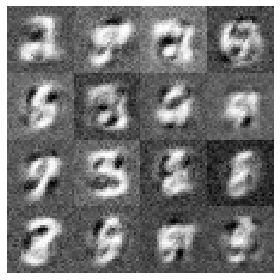

Epoch [27/100], d_loss: 0.0534, g_loss: 7.7353, D_real: 0.970, D_fake: 0.011
starting...
showing...


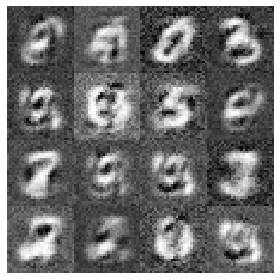

Epoch [28/100], d_loss: 0.0443, g_loss: 8.1923, D_real: 0.983, D_fake: 0.017
starting...
showing...


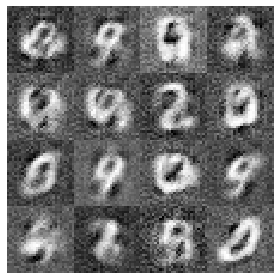

Epoch [29/100], d_loss: 0.1395, g_loss: 6.6779, D_real: 0.968, D_fake: 0.039
starting...
showing...


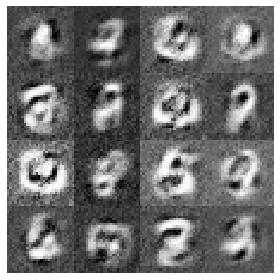

Epoch [30/100], d_loss: 0.0774, g_loss: 6.9304, D_real: 0.974, D_fake: 0.030
starting...
showing...


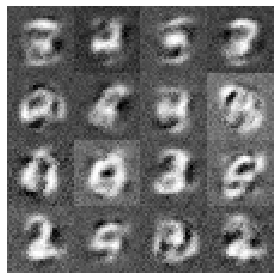

Epoch [31/100], d_loss: 0.0781, g_loss: 6.8862, D_real: 0.966, D_fake: 0.027
starting...
showing...


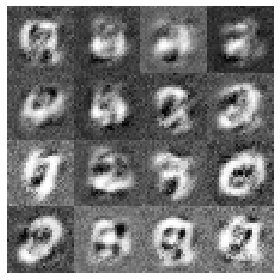

Epoch [32/100], d_loss: 0.1677, g_loss: 5.8222, D_real: 0.977, D_fake: 0.050
starting...
showing...


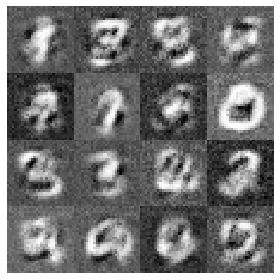

Epoch [33/100], d_loss: 0.1176, g_loss: 7.5653, D_real: 0.982, D_fake: 0.014
starting...
showing...


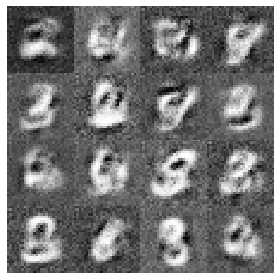

Epoch [34/100], d_loss: 0.0660, g_loss: 9.8165, D_real: 0.958, D_fake: 0.003
starting...
showing...


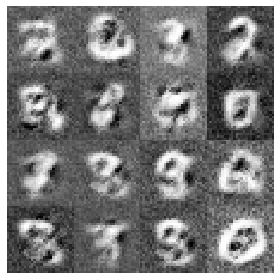

Epoch [35/100], d_loss: 0.0572, g_loss: 8.4024, D_real: 0.986, D_fake: 0.026
starting...
showing...


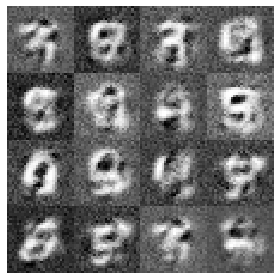

Epoch [36/100], d_loss: 0.1508, g_loss: 8.4913, D_real: 0.965, D_fake: 0.032
starting...
showing...


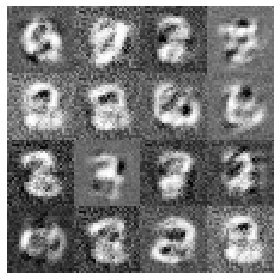

Epoch [37/100], d_loss: 0.0798, g_loss: 6.1218, D_real: 0.982, D_fake: 0.021
starting...
showing...


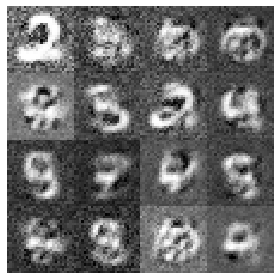

Epoch [38/100], d_loss: 0.1045, g_loss: 9.6091, D_real: 0.956, D_fake: 0.007
starting...
showing...


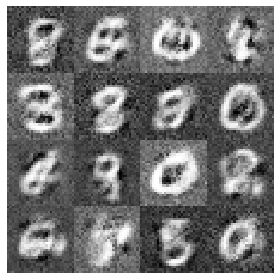

Epoch [39/100], d_loss: 0.0200, g_loss: 7.3485, D_real: 0.987, D_fake: 0.006
starting...
showing...


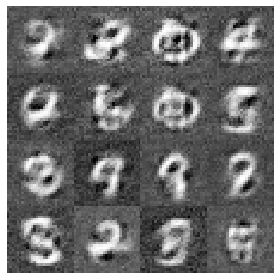

Epoch [40/100], d_loss: 0.0421, g_loss: 9.3131, D_real: 0.977, D_fake: 0.008
starting...
showing...


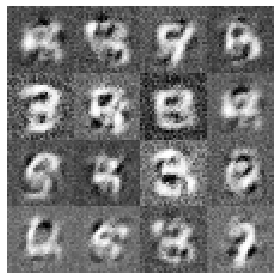

Epoch [41/100], d_loss: 0.1263, g_loss: 8.0286, D_real: 0.955, D_fake: 0.025
starting...
showing...


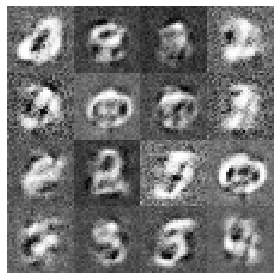

Epoch [42/100], d_loss: 0.2507, g_loss: 7.5514, D_real: 0.952, D_fake: 0.028
starting...
showing...


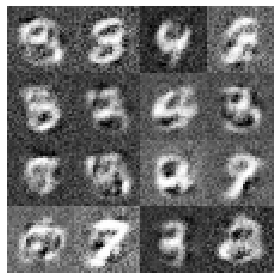

Epoch [43/100], d_loss: 0.2226, g_loss: 6.7557, D_real: 0.952, D_fake: 0.021
starting...
showing...


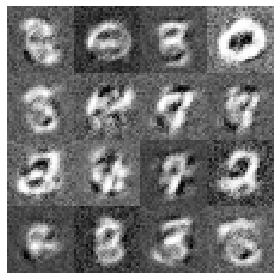

Epoch [44/100], d_loss: 0.1095, g_loss: 8.3546, D_real: 0.954, D_fake: 0.011
starting...
showing...


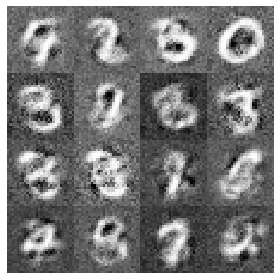

Epoch [45/100], d_loss: 0.1030, g_loss: 6.5463, D_real: 0.994, D_fake: 0.055
starting...
showing...


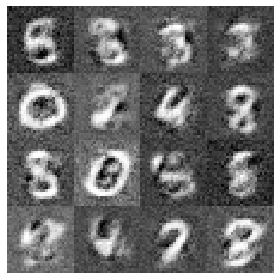

Epoch [46/100], d_loss: 0.1088, g_loss: 6.8190, D_real: 0.967, D_fake: 0.044
starting...
showing...


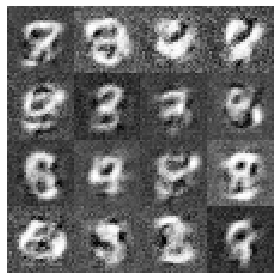

Epoch [47/100], d_loss: 0.1248, g_loss: 7.5900, D_real: 0.997, D_fake: 0.052
starting...
showing...


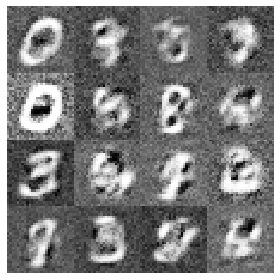

Epoch [48/100], d_loss: 0.0650, g_loss: 9.0988, D_real: 0.966, D_fake: 0.014
starting...
showing...


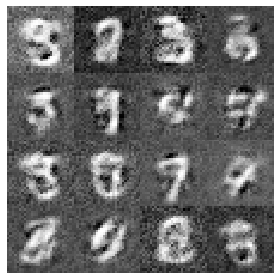

Epoch [49/100], d_loss: 0.1219, g_loss: 6.2344, D_real: 0.971, D_fake: 0.049
starting...
showing...


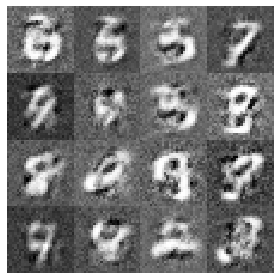

Epoch [50/100], d_loss: 0.0493, g_loss: 9.1017, D_real: 0.970, D_fake: 0.010
starting...
showing...


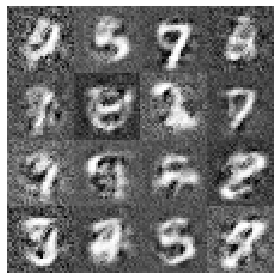

Epoch [51/100], d_loss: 0.1093, g_loss: 7.5293, D_real: 0.969, D_fake: 0.032
starting...
showing...


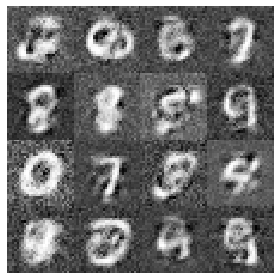

Epoch [52/100], d_loss: 0.0954, g_loss: 5.8689, D_real: 0.969, D_fake: 0.023
starting...
showing...


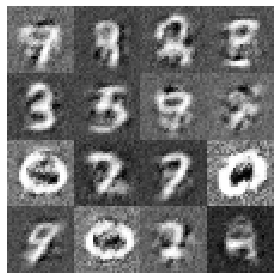

Epoch [53/100], d_loss: 0.1954, g_loss: 7.9426, D_real: 0.962, D_fake: 0.041
starting...
showing...


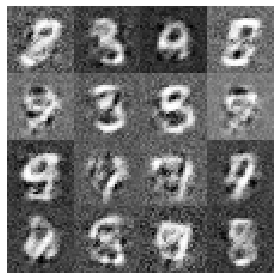

Epoch [54/100], d_loss: 0.0848, g_loss: 7.0794, D_real: 0.986, D_fake: 0.043
starting...
showing...


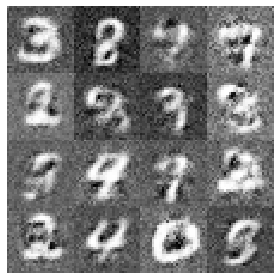

Epoch [55/100], d_loss: 0.1168, g_loss: 7.7549, D_real: 0.967, D_fake: 0.032
starting...
showing...


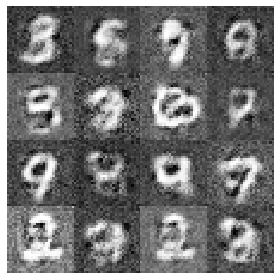

Epoch [56/100], d_loss: 0.1175, g_loss: 6.5654, D_real: 0.988, D_fake: 0.073
starting...
showing...


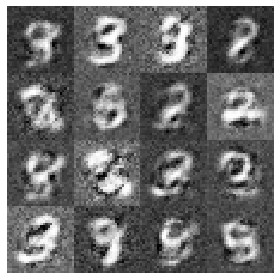

Epoch [57/100], d_loss: 0.0536, g_loss: 6.0616, D_real: 0.989, D_fake: 0.029
starting...
showing...


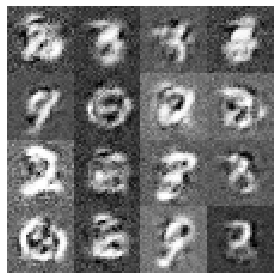

Epoch [58/100], d_loss: 0.1163, g_loss: 7.3094, D_real: 0.966, D_fake: 0.038
starting...
showing...


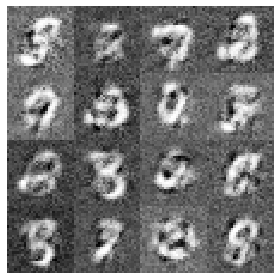

Epoch [59/100], d_loss: 0.0906, g_loss: 7.8182, D_real: 0.980, D_fake: 0.034
starting...
showing...


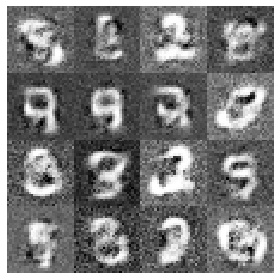

Epoch [60/100], d_loss: 0.0866, g_loss: 8.4758, D_real: 0.958, D_fake: 0.022
starting...
showing...


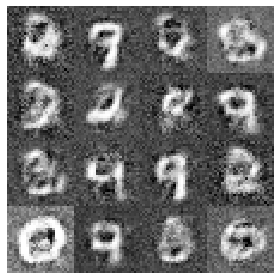

Epoch [61/100], d_loss: 0.2161, g_loss: 5.8111, D_real: 0.950, D_fake: 0.053
starting...
showing...


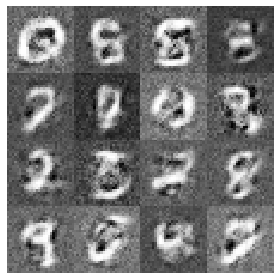

Epoch [62/100], d_loss: 0.0864, g_loss: 6.8324, D_real: 0.970, D_fake: 0.037
starting...
showing...


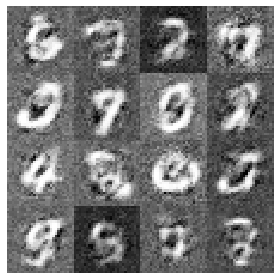

Epoch [63/100], d_loss: 0.1373, g_loss: 7.4042, D_real: 0.981, D_fake: 0.062
starting...
showing...


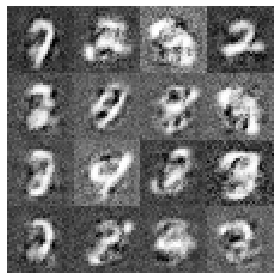

Epoch [64/100], d_loss: 0.2163, g_loss: 4.7357, D_real: 0.994, D_fake: 0.110
starting...
showing...


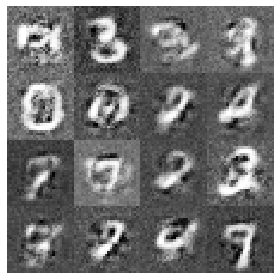

Epoch [65/100], d_loss: 0.1332, g_loss: 5.9426, D_real: 0.968, D_fake: 0.066
starting...
showing...


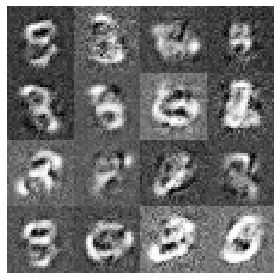

Epoch [66/100], d_loss: 0.2028, g_loss: 6.6628, D_real: 0.987, D_fake: 0.101
starting...
showing...


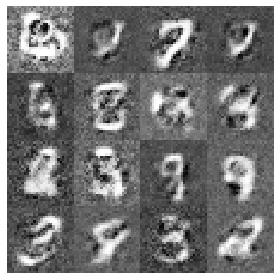

Epoch [67/100], d_loss: 0.1329, g_loss: 5.4470, D_real: 0.972, D_fake: 0.059
starting...
showing...


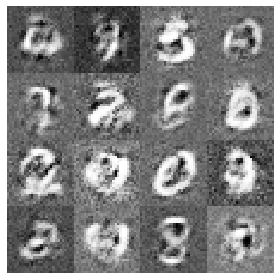

Epoch [68/100], d_loss: 0.1057, g_loss: 6.4828, D_real: 0.979, D_fake: 0.052
starting...
showing...


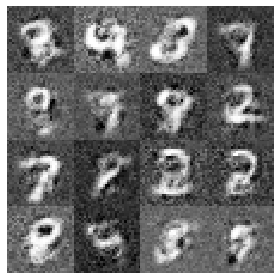

Epoch [69/100], d_loss: 0.1419, g_loss: 7.0984, D_real: 0.953, D_fake: 0.023
starting...
showing...


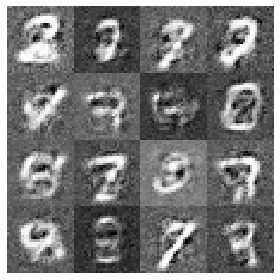

Epoch [70/100], d_loss: 0.1233, g_loss: 5.9721, D_real: 0.966, D_fake: 0.043
starting...
showing...


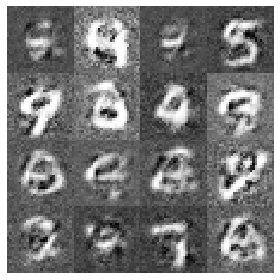

Epoch [71/100], d_loss: 0.0866, g_loss: 7.2595, D_real: 0.978, D_fake: 0.041
starting...
showing...


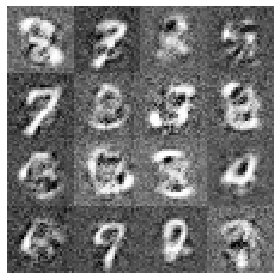

Epoch [72/100], d_loss: 0.1091, g_loss: 7.0237, D_real: 0.965, D_fake: 0.046
starting...
showing...


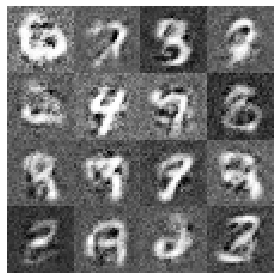

Epoch [73/100], d_loss: 0.0765, g_loss: 5.6825, D_real: 0.990, D_fake: 0.051
starting...
showing...


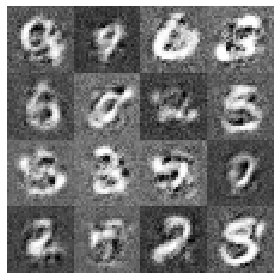

Epoch [74/100], d_loss: 0.1374, g_loss: 6.5281, D_real: 0.985, D_fake: 0.076
starting...
showing...


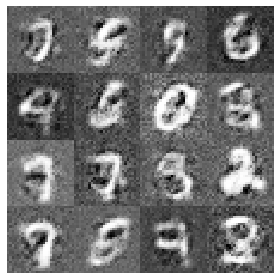

Epoch [75/100], d_loss: 0.1214, g_loss: 5.5069, D_real: 0.975, D_fake: 0.060
starting...
showing...


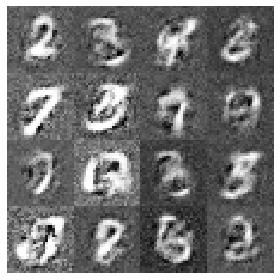

Epoch [76/100], d_loss: 0.1013, g_loss: 5.9421, D_real: 0.965, D_fake: 0.046
starting...
showing...


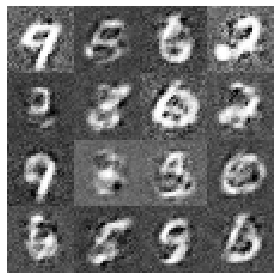

Epoch [77/100], d_loss: 0.1448, g_loss: 5.9689, D_real: 0.945, D_fake: 0.028
starting...
showing...


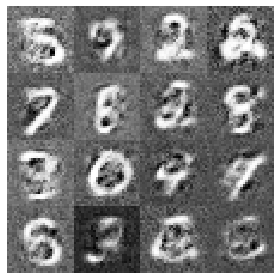

Epoch [78/100], d_loss: 0.1122, g_loss: 5.6604, D_real: 0.971, D_fake: 0.054
starting...
showing...


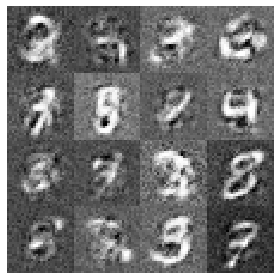

Epoch [79/100], d_loss: 0.3532, g_loss: 5.4261, D_real: 0.935, D_fake: 0.110
starting...
showing...


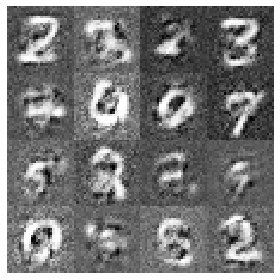

Epoch [80/100], d_loss: 0.1196, g_loss: 5.5770, D_real: 0.977, D_fake: 0.066
starting...
showing...


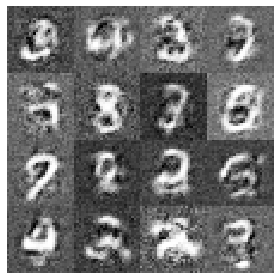

Epoch [81/100], d_loss: 0.2355, g_loss: 7.4651, D_real: 0.938, D_fake: 0.037
starting...
showing...


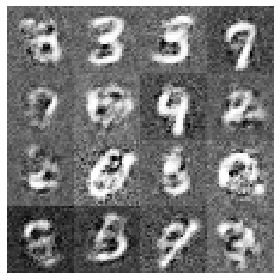

Epoch [82/100], d_loss: 0.3212, g_loss: 6.2362, D_real: 0.875, D_fake: 0.010
starting...
showing...


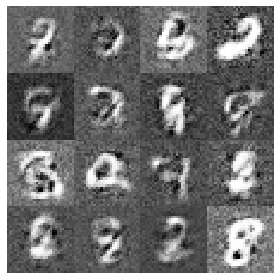

Epoch [83/100], d_loss: 0.1422, g_loss: 6.9828, D_real: 0.956, D_fake: 0.051
starting...
showing...


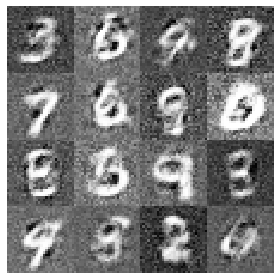

Epoch [84/100], d_loss: 0.2336, g_loss: 5.1516, D_real: 0.963, D_fake: 0.105
starting...
showing...


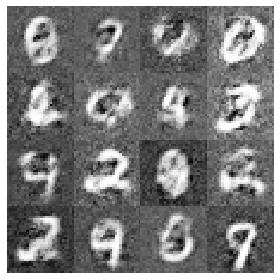

Epoch [85/100], d_loss: 0.1018, g_loss: 5.1667, D_real: 0.955, D_fake: 0.034
starting...
showing...


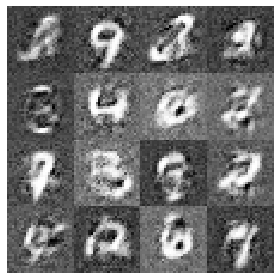

Epoch [86/100], d_loss: 0.2539, g_loss: 4.8351, D_real: 0.933, D_fake: 0.076
starting...
showing...


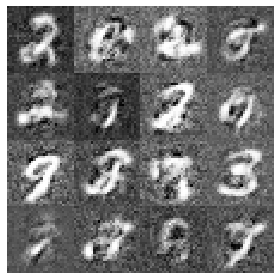

Epoch [87/100], d_loss: 0.1375, g_loss: 5.9694, D_real: 0.947, D_fake: 0.041
starting...
showing...


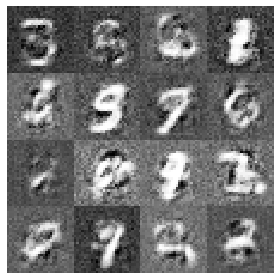

Epoch [88/100], d_loss: 0.3501, g_loss: 6.2428, D_real: 0.947, D_fake: 0.124
starting...
showing...


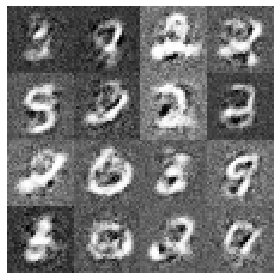

Epoch [89/100], d_loss: 0.1394, g_loss: 6.3821, D_real: 0.931, D_fake: 0.023
starting...
showing...


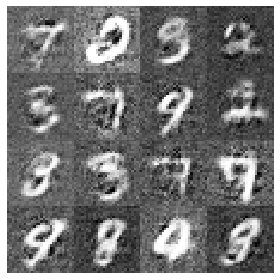

Epoch [90/100], d_loss: 0.1882, g_loss: 5.3099, D_real: 0.957, D_fake: 0.078
starting...
showing...


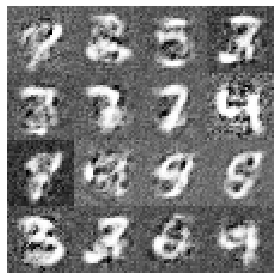

Epoch [91/100], d_loss: 0.3585, g_loss: 5.9321, D_real: 0.863, D_fake: 0.032
starting...
showing...


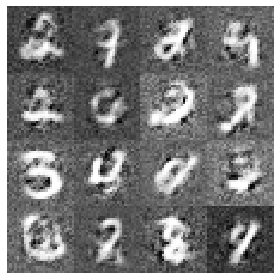

Epoch [92/100], d_loss: 0.1349, g_loss: 6.7013, D_real: 0.949, D_fake: 0.052
starting...
showing...


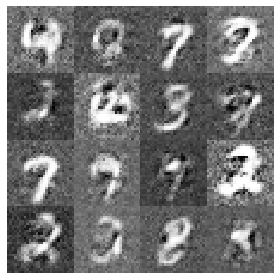

Epoch [93/100], d_loss: 0.1868, g_loss: 5.5732, D_real: 0.946, D_fake: 0.071
starting...
showing...


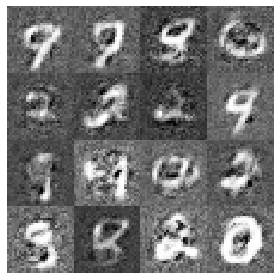

Epoch [94/100], d_loss: 0.1333, g_loss: 6.2661, D_real: 0.950, D_fake: 0.037
starting...
showing...


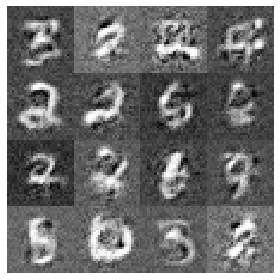

Epoch [95/100], d_loss: 0.1237, g_loss: 7.0699, D_real: 0.945, D_fake: 0.020
starting...
showing...


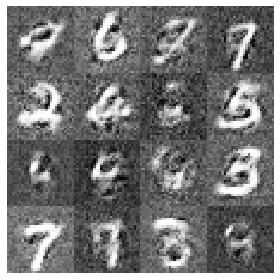

Epoch [96/100], d_loss: 0.2393, g_loss: 7.3775, D_real: 0.947, D_fake: 0.049
starting...
showing...


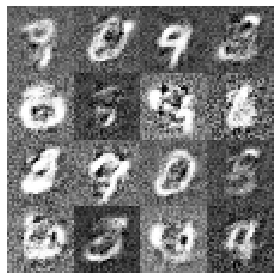

Epoch [97/100], d_loss: 0.1461, g_loss: 6.9384, D_real: 0.938, D_fake: 0.038
starting...
showing...


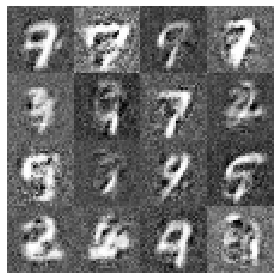

Epoch [98/100], d_loss: 0.1898, g_loss: 6.8199, D_real: 0.918, D_fake: 0.028
starting...
showing...


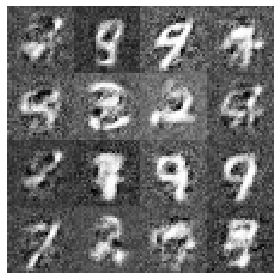

Epoch [99/100], d_loss: 0.3006, g_loss: 5.7572, D_real: 0.938, D_fake: 0.104
starting...
showing...


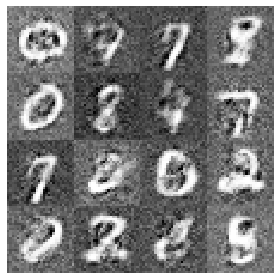

In [4]:
# train
if __name__ == '__main__':
    criterion = nn.BCELoss().to(device)
    num_img = 100 
    z_dim = 100 
    D = discriminator().to(device)
    G = generator(z_dim).to(device)
    _, _, train_loader, test_loader = load_MNIST(num_img)
    d_optimizer=optim.Adam(D.parameters(), lr=0.0003)
    g_optimizer=optim.Adam(G.parameters(), lr=0.0003)
    '''
    交替训练的方式训练网络
    先训练判别器网络D再训练生成器网络G
    不同网络的训练次数是超参数
    也可以两个网络训练相同的次数
    这样就可以不用分别训练两个网络
    '''

    # 鉴别器D的训练,固定G的参数
    epoch = 100 
    gepoch = 1 
    for i in range(epoch):
        for (img, label) in train_loader:
            img, label = img.to(device), label.to(device)
            '''
            train D 
            '''
            # num_img=img.size()[0]
            real_img = img.view(num_img, -1)  # 展开为28*28 = 784
            real_label = torch.ones(num_img).to(device)   # 真实label为1
            fake_label = torch.zeros(num_img).to(device)  # 假的label为0
            
            # compute loss of real_img
            real_out = D(real_img)  # 真实图片送入鉴别器D输出0~1
            d_loss_real = criterion(real_out, real_label) # 得到loss
            real_scores = real_out  # 真实图片放入判别器输出越接近1越好
            
            # compute loss of fake_img
            z = torch.randn(num_img, z_dim).to(device)  # 随机生成向量
            fake_img = G(z)  # 将向量放入生成网络G生成一张图片
            fake_out = D(fake_img)  # 判别器判断假的图片
            d_loss_fake = criterion(fake_out, fake_label)  # 假的图片的loss
            fake_scores = fake_out  # 假的图片放入判别器输出越接近0越好
            
            # D backpropagetion and optim
            d_loss = d_loss_real + d_loss_fake
            d_optimizer.zero_grad()
            d_loss.backward()
            d_optimizer.step()
            
            '''
            train G
            '''
            # compute loss of fake_img
            for j in range(gepoch):
                fake_label = torch.ones(num_img).to(device)   # 完成欺骗的真实label为1
                z = torch.randn(num_img, z_dim).to(device) 
                fake_img = G(z)      # 将向量放入生成网络G生成一张图片
                output = D(fake_img)  # 输入鉴别器得到判别结果
                g_loss = criterion(output, fake_label)
                g_optimizer.zero_grad()
                g_loss.backward()
                g_optimizer.step()
                
        print('Epoch [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D_real: {:.3f}, D_fake: {:.3f}'.format(
            i, epoch, d_loss.item(), g_loss.item(), real_scores.data.mean(), fake_scores.data.mean()))
        show_images(fake_img.cpu(), i)
        plt.show()